<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Loading-and-Preparation" data-toc-modified-id="Data-Loading-and-Preparation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Loading and Preparation</a></span><ul class="toc-item"><li><span><a href="#Importing-Required-Libraries" data-toc-modified-id="Importing-Required-Libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Importing Required Libraries</a></span></li><li><span><a href="#Open-the-file-and-explore-the-data." data-toc-modified-id="Open-the-file-and-explore-the-data.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Open the file and explore the data.</a></span></li></ul></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analysis</a></span><ul class="toc-item"><li><span><a href="#Review-the-data." data-toc-modified-id="Review-the-data.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Review the data.</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span><strong>Conclusion</strong></a></span></li></ul></li><li><span><a href="#Training" data-toc-modified-id="Training-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Training</a></span><ul class="toc-item"><li><span><a href="#Plan" data-toc-modified-id="Plan-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Plan</a></span></li><li><span><a href="#Split-the-dataset-into-training-and-test-sets." data-toc-modified-id="Split-the-dataset-into-training-and-test-sets.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Split the dataset into training and test sets.</a></span></li><li><span><a href="#Without-model-training-(Baseline-model)" data-toc-modified-id="Without-model-training-(Baseline-model)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Without model training (Baseline model)</a></span><ul class="toc-item"><li><span><a href="#Constant---mean()" data-toc-modified-id="Constant---mean()-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Constant - mean()</a></span></li><li><span><a href="#Previous-time-series-value" data-toc-modified-id="Previous-time-series-value-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Previous time series value</a></span></li></ul></li><li><span><a href="#Models-Training" data-toc-modified-id="Models-Training-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Models Training</a></span><ul class="toc-item"><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#Decision-Tree-Regression" data-toc-modified-id="Decision-Tree-Regression-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>Decision Tree Regression</a></span></li><li><span><a href="#LightGBM-Regression" data-toc-modified-id="LightGBM-Regression-3.4.3"><span class="toc-item-num">3.4.3&nbsp;&nbsp;</span>LightGBM Regression</a></span></li><li><span><a href="#K-Nearest-Neighbors-Regression-(KNN)" data-toc-modified-id="K-Nearest-Neighbors-Regression-(KNN)-3.4.4"><span class="toc-item-num">3.4.4&nbsp;&nbsp;</span>K-Nearest Neighbors Regression (KNN)</a></span></li><li><span><a href="#XGBRegressor" data-toc-modified-id="XGBRegressor-3.4.5"><span class="toc-item-num">3.4.5&nbsp;&nbsp;</span>XGBRegressor</a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-3.4.6"><span class="toc-item-num">3.4.6&nbsp;&nbsp;</span>CatBoostRegressor</a></span></li><li><span><a href="#Neural-Network-Construction" data-toc-modified-id="Neural-Network-Construction-3.4.7"><span class="toc-item-num">3.4.7&nbsp;&nbsp;</span>Neural Network Construction</a></span></li></ul></li><li><span><a href="#Conclusion:" data-toc-modified-id="Conclusion:-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span><strong>Conclusion</strong>:</a></span></li></ul></li><li><span><a href="#Testing" data-toc-modified-id="Testing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Testing</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusions</a></span><ul class="toc-item"><li><span><a href="#Recommendations" data-toc-modified-id="Recommendations-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Recommendations</a></span></li></ul></li></ul></div>


#  Forecasting the Number of Orders for a Taxi Service

The taxi company aims to optimize fleet management at airports through accurate demand forecasting, ensuring more drivers are available during peak hours.

**Task:** Develop and train a model to forecast the number of taxi orders for the next hour using the provided labeled dataset. The target metric is an RMSE of no more than 48 on the test set.

**Project Plan:**

1. Load the data and resample it by one-hour intervals.
2. Analyze the dataset.
3. Train various models with different hyperparameters. Create a test set (10% of the original data).
4. Evaluate the best-performing model on the test set and draw conclusions.

**Data Description:**

- The data is stored in the `taxi.csv` file.

- The number of orders is located in the `num_orders` column.

## Data Loading and Preparation

### Importing Required Libraries

In [1]:
!pip install lightgbm
!pip install torch torchvision torchaudio
!pip install catboost

In [2]:
# 1. Core Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# 2. Machine Learning Models
import torch
import torch.nn as nn
import torch.optim as optim
import lightgbm as lgb
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# 3. Time and Statistics
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from math import sqrt

# 4. Data Scaling and Processing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit, cross_val_score
from sklearn.metrics import mean_squared_error

print('Libraries imported')

Libraries imported


In [3]:
RANDOM_STATE = 42
# a special class for time series splitting
tscv = TimeSeriesSplit(n_splits=5)

### Open the file and explore the data.

In [4]:
# Main file path
main_path = r'XXX\taxi.csv'

# Alternative file paths
pth1 = '/folder_1/data.csv'
pth2 = '/folder_2/data.csv'

# Check for the main file; if it doesn't exist, search in other directories.
if os.path.exists(main_path):
    data = pd.read_csv(main_path, parse_dates=[0], index_col=[0])
elif os.path.exists(pth1):
    data = pd.read_csv(pth1, parse_dates=[0], index_col=[0])
elif os.path.exists(pth2):
    data = pd.read_csv(pth2, parse_dates=[0], index_col=[0])
else:
    print('Something is wrong')

Perform data resampling with hourly intervals using the summation function.

In [5]:
data.sort_index(inplace=True)
print(data.index.is_monotonic_increasing)
data = data.resample('1h').sum()

True


In [6]:
print(f'Database size: {data.shape}')
print(data.info())

Database size: (4416, 1)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: h
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB
None


In [7]:
data.head(5)

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


In [8]:
print('start time -', data.index.min())
print('finish time -', data.index.max())

start time - 2018-03-01 00:00:00
finish time - 2018-08-31 23:00:00


- The dataset contains 4,416 rows with no missing values.  
- Dates have been converted to datetime format and set as indexes.  
- The `num_orders` column represents the number of taxi orders per hour.  
- The time period covers March 1, 2018, to August 31, 2018.

## Analysis

### Review the data.

Display the unique values for the number of orders.

In [9]:
sorted(data['num_orders'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 182,
 183,
 184,
 185,


In [10]:
data.describe()

,num_orders
count,4416.000000
mean,84.422781
std,45.023853
min,0.000000
25%,54.000000
50%,78.000000
75%,107.000000
max,462.000000


Plot the order count graphs and check for outliers.

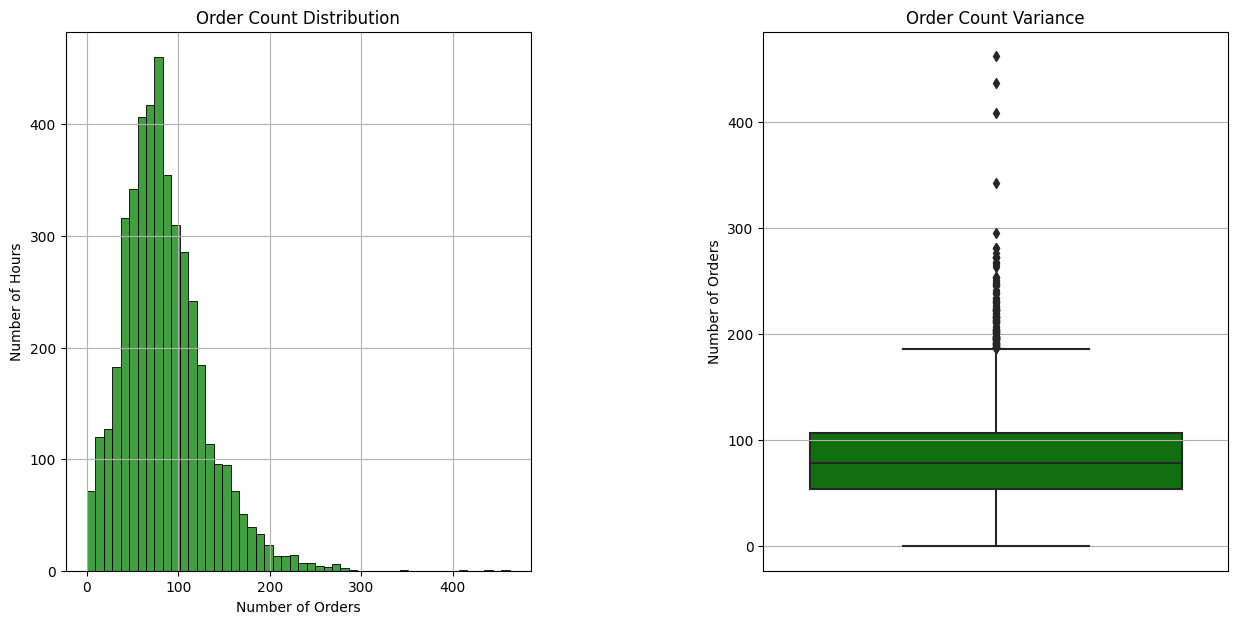

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
axe = axes.ravel()

# Histogram
sns.histplot(data['num_orders'], kde=False, bins=50, ax=axe[0], color='green')
axe[0].set_title('Order Count Distribution')
axe[0].set_xlabel('Number of Orders')
axe[0].set_ylabel('Number of Hours')
axe[0].grid(True) 

# Boxplot
sns.boxplot(y='num_orders', data=data, ax=axe[1], color='green')
axe[1].set_title('Order Count Variance')
axe[1].set_ylabel('Number of Orders')
axe[1].set_xticks([])
axe[1].grid(True) 

plt.show()

The number of orders can indeed vary significantly across different days and hours, so we will not make any adjustments for zero values or outliers.

Plot trends and seasonality.

In [12]:
decomposed = seasonal_decompose(data)

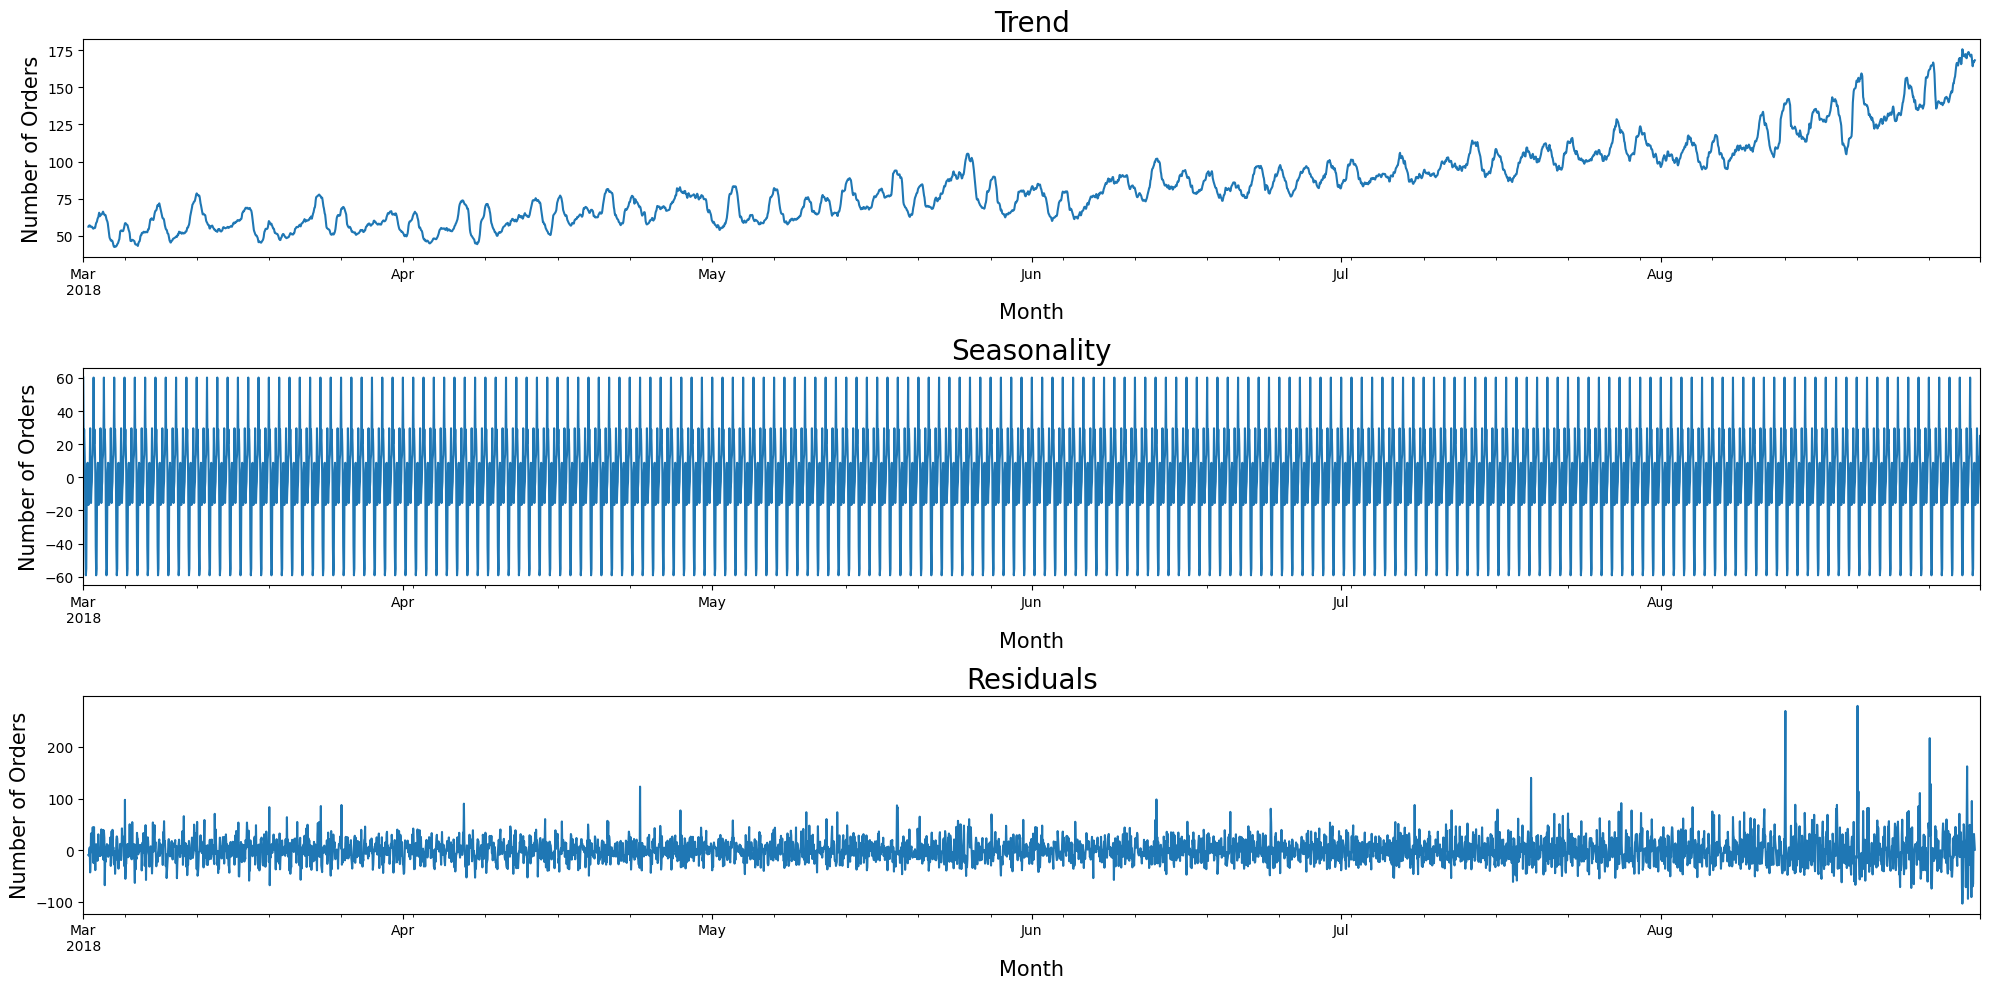

In [13]:
plt.figure(figsize=(20, 10))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend', fontsize=20)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Number of Orders', fontsize=15)
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality', fontsize=20)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Number of Orders', fontsize=15)
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals', fontsize=20)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Number of Orders', fontsize=15)
plt.tight_layout()

- **Trend:** An increase in the number of orders until early August, followed by a sharp spike in August.  
- **Seasonality:** Periodicity of less than a month. The graph is not conclusive due to the high variability of time series.  
- **Residuals and Outliers:** Unexplained anomalies.

Plot the seasonality graph with a 2-week and 2-day scale for better visualization.

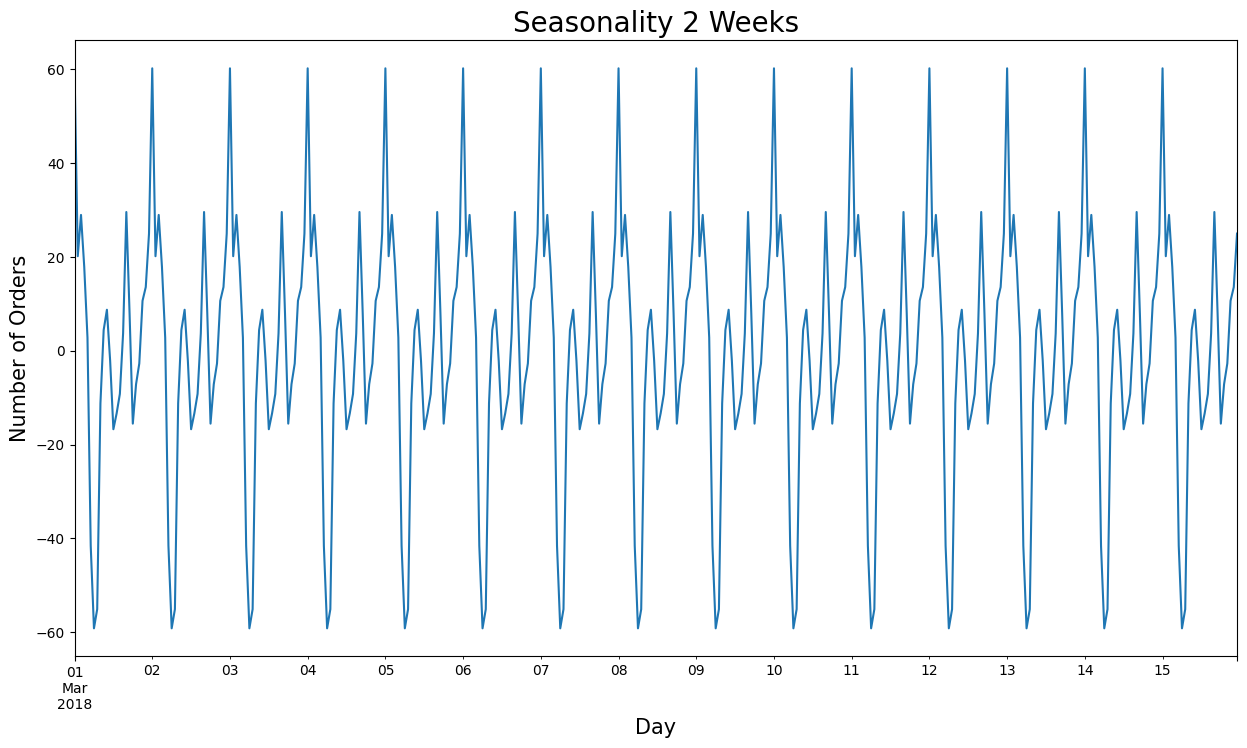

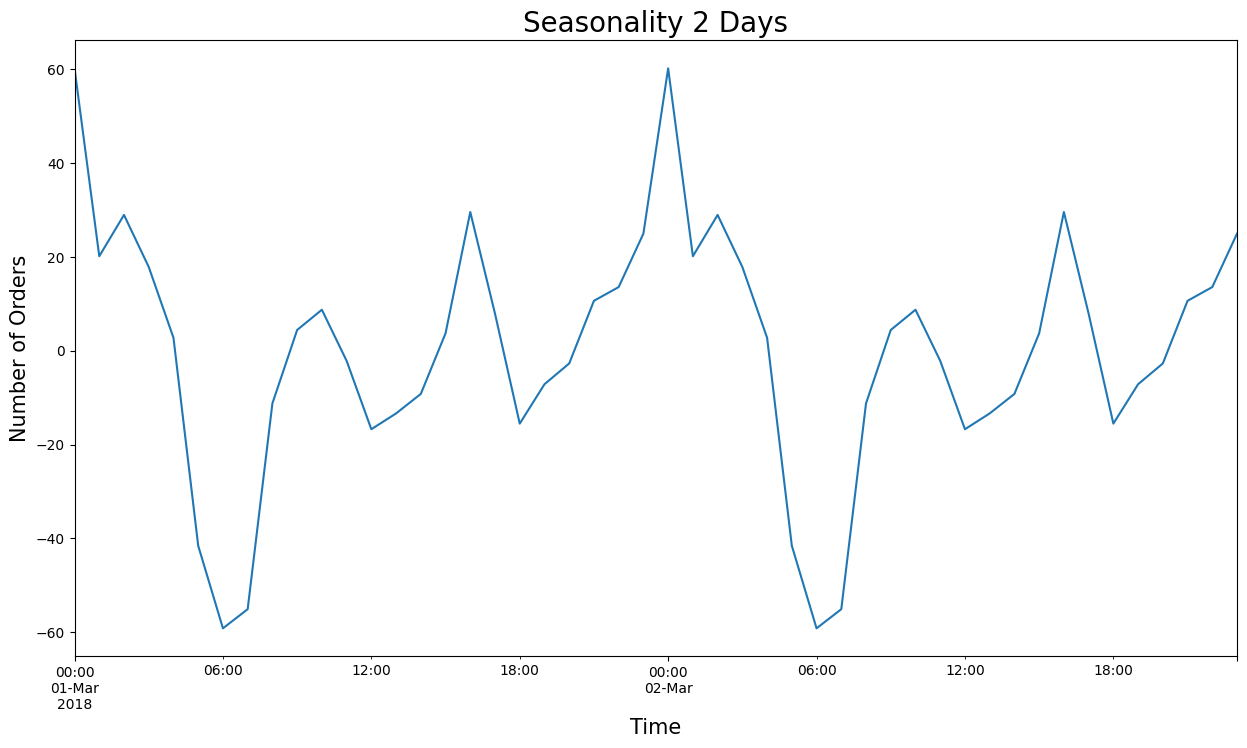

In [14]:
plt.figure(figsize=(15,8))

decomposed.seasonal['2018-03-01':'2018-03-15'].plot(ax=plt.gca(), figsize=(15,8))
plt.title('Seasonality 2 Weeks', fontsize=20)
plt.xlabel('Day', fontsize=15)
plt.ylabel('Number of Orders', fontsize=15)

plt.figure(figsize=(15,8))

decomposed.seasonal['2018-03-01':'2018-03-02'].plot(ax=plt.gca(), figsize=(15,8))
plt.title('Seasonality 2 Days', fontsize=20)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Number of Orders', fontsize=15);

The peak number of orders occurs at midnight, followed by a drop around 6:00 AM, with two subsequent peaks at 11:30 AM and 5:30 PM—times typically associated with pre-lunch hours and the end of the workday.  

These peaks might be related to flight schedules.  

A clear 24-hour pattern is also evident, indicating a daily seasonality cycle.

Plot the graphs using a 24-hour (daily) moving average.

In [15]:
data['rolling_mean'] = data.shift().rolling(24).mean()

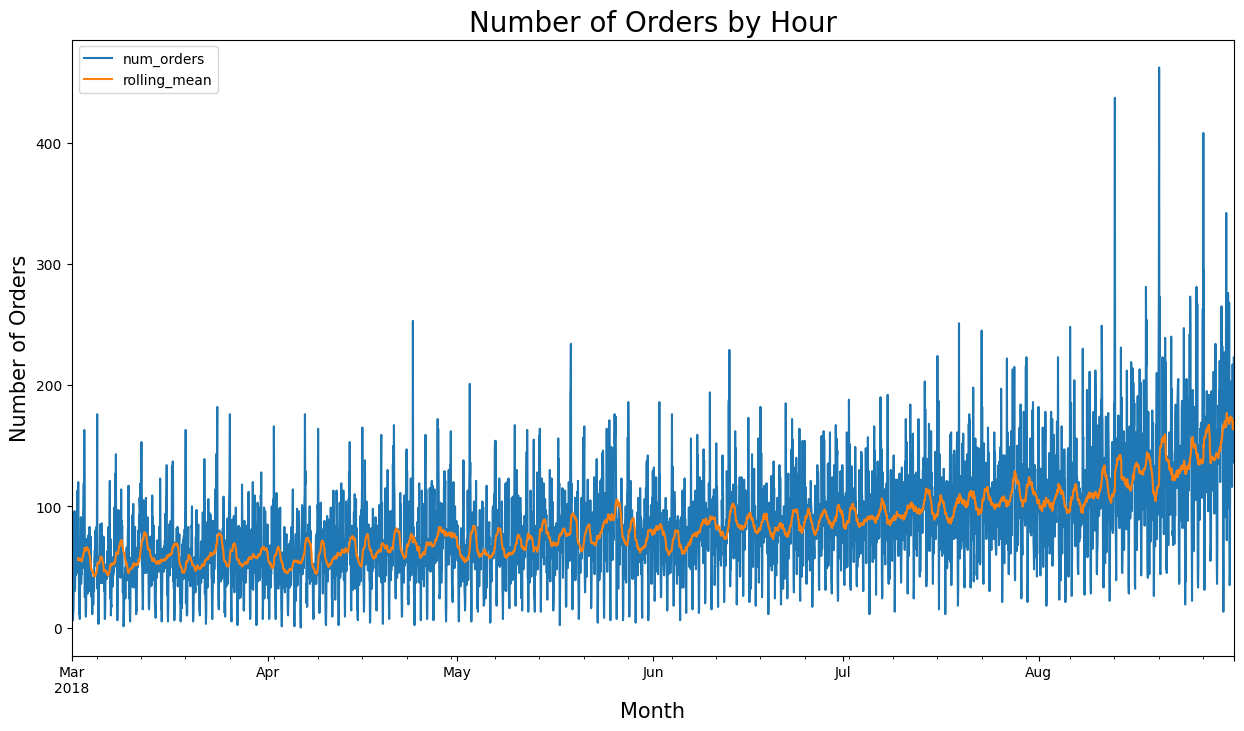

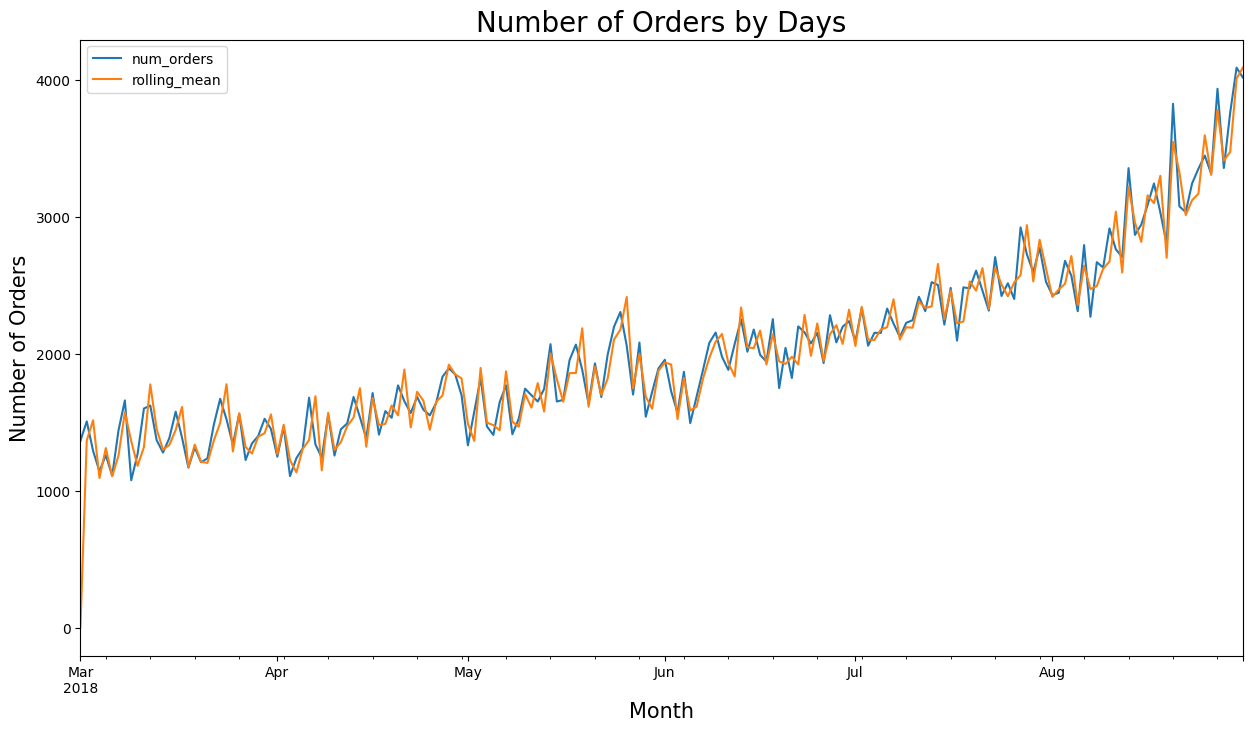

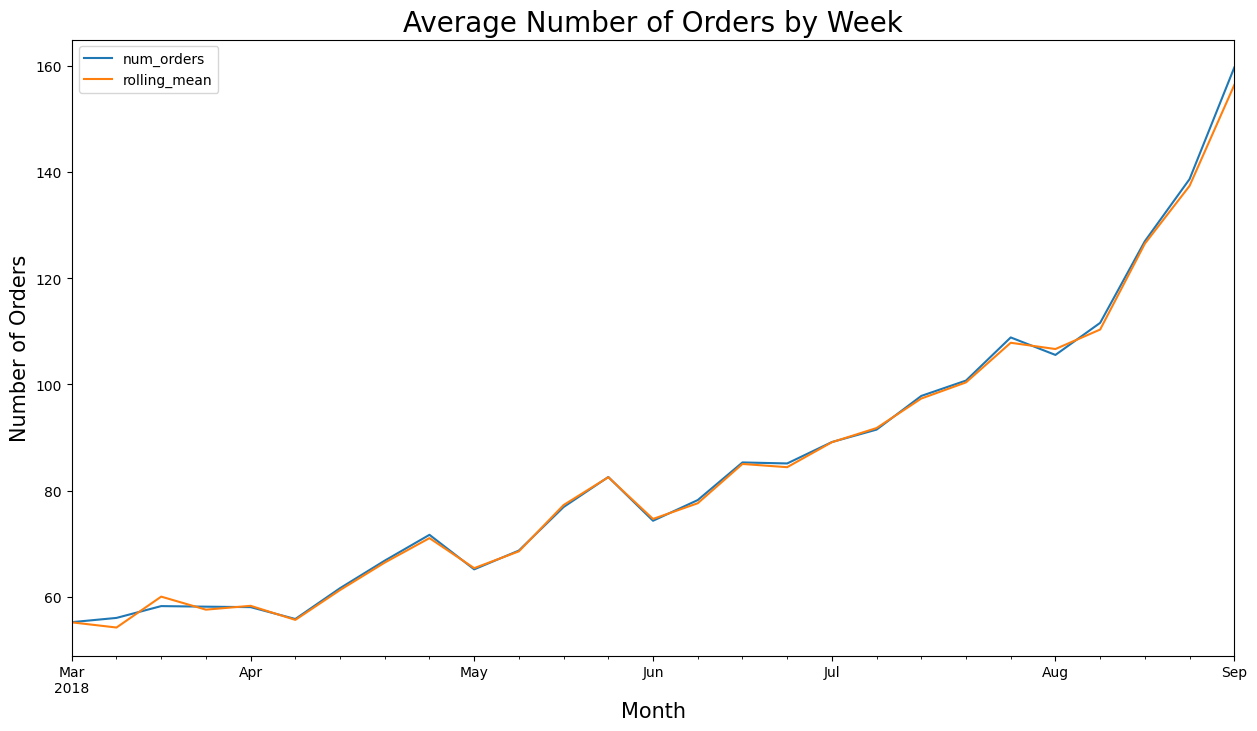

In [16]:
data.plot(figsize=(15,8))
plt.title('Number of Orders by Hour', fontsize=20)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Number of Orders', fontsize=15)
plt.show()

data_1 = data.resample('1D').sum()
data_1.plot(figsize=(15,8))
plt.title('Number of Orders by Days', fontsize=20)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Number of Orders', fontsize=15)
plt.show()

data_2 = data.resample('1W').mean()
data_2.plot(figsize=(15,8))
plt.title('Average Number of Orders by Week', fontsize=20)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Number of Orders', fontsize=15)
plt.show()

- The hourly breakdown graph shows peak values in August.  
- The daily and weekly average order graphs reveal a steady increase in orders from March to early August, with a noticeable surge in August, likely due to the vacation season and students returning for the school year.  
- **Conclusion:** The moving average increases over time, indicating that the time series is non-stationary.

Let's test the series for stationarity using the Augmented Dickey-Fuller (ADF) test.

**Hypotheses:**
- **Null hypothesis:** The time series is non-stationary.  
- **Alternative hypothesis:** The time series is stationary.

**Comparison of p-value with 𝛼 (significance level):**  
If p-value < 𝛼, we reject the null hypothesis, indicating that the series is stationary.

In [17]:
# Applying the Dickey-Fuller test
result = adfuller(data['num_orders'].dropna())  # Remove NaN values

# Significance level
alpha = 0.05

# Displaying test results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items(): # Check at 1%, 5%, and 10% levels
    print('\t%s: %.3f' % (key, value))

# Comparing p-value with alpha
if result[1] < alpha:
    print(f"p-value ({result[1]:.4f}) < alpha ({alpha}), therefore, the series is stationary (reject the null hypothesis).")
else:
    print(f"p-value ({result[1]:.4f}) >= alpha ({alpha}), therefore, the series is non-stationary (fail to reject the null hypothesis).")

ADF Statistic: -3.068924
p-value: 0.028940
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
p-value (0.0289) < alpha (0.05), therefore, the series is stationary (reject the null hypothesis).


Interpretation and Conclusion:

**ADF Statistic: -3.0689**
The Dickey-Fuller test statistic is -3.0689. This value will be compared with critical values at different significance levels (1%, 5%, 10%) to determine whether the null hypothesis of non-stationarity can be rejected.

**p-value: 0.0289**
The p-value is 0.0289, which is less than the chosen significance level α = 0.05. This means there is only a 2.89% chance of obtaining such a result if the null hypothesis were true. Since the p-value is less than 0.05, we reject the null hypothesis of non-stationarity.

**Critical Values:**

- 1%: -3.432
At the 1% significance level, the test statistic (-3.0689) is greater than the critical value, so we cannot reject the null hypothesis at this level.

- 5%: -2.862
At the 5% significance level, the test statistic (-3.0689) is less than the critical value, so we reject the null hypothesis.

- 10%: -2.567
At the 10% significance level, we can also reject the null hypothesis, as the test statistic is less than the critical value.

**Conclusion:**

- We cannot reject the null hypothesis at the stricter 1% significance level.  
- There is a noticeable upward trend in the moving average on the graphs.  

We conclude that the time series is non-stationary.

Remove the moving average column to avoid interference with further analysis.

In [18]:
data = data.drop('rolling_mean', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: h
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB


Add new columns based on the observed trends and seasonality in the data analysis. Include the day and day of the week, as they influence the number of orders. The month column will not be added, as the dataset does not cover a full year, making it ineffective for the model when evaluating test data.

In [19]:
data['day'] = data.index.day
data['dayofweek'] = data.index.dayofweek
data['hour'] = data.index.hour

display(data.head())
print(data.info())

,num_orders,day,dayofweek,hour
datetime,,,,
2018-03-01 00:00:00,124,1,3,0
2018-03-01 01:00:00,85,1,3,1
2018-03-01 02:00:00,71,1,3,2
2018-03-01 03:00:00,66,1,3,3
2018-03-01 04:00:00,43,1,3,4


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: h
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
 1   day         4416 non-null   int32
 2   dayofweek   4416 non-null   int32
 3   hour        4416 non-null   int32
dtypes: int32(3), int64(1)
memory usage: 120.8 KB
None


### **Conclusion**

The analysis revealed a correlation between the number of orders and both the month and time of day.

- The number of orders increases from March to August, peaking in August.  
- The highest order volume occurs at midnight, followed by a decline until 6:00 AM, with two additional peaks at 11:30 AM and 5:30 PM, possibly linked to flight schedules.  
- Clear daily patterns are evident in the order data.  
- To support further analysis and forecasting, new columns were added, including data for days, weekdays, and hours.

## Training

- Develop a model to predict the number of taxi orders for the next hour.  
- Set the test set size to 10%.  
- Ensure the RMSE on the test set does not exceed 48.

### Plan

1. Split the dataset into training and test sets, allocating 10% of the data for testing.  
2. Forecast the baseline number of orders without using a model — this will serve as a benchmark to assess the adequacy of the developed models.  
3. Optimize hyperparameters for the **LinearRegression** model — identify the best values for the number of time series lags and the rolling mean window size to determine the most effective solution for further model applications.  
4. Train models and evaluate their performance using cross-validation.  
5. Evaluate the model on the training set — calculate RMSE on the training set using the best parameters (lags and rolling mean) and measure the model training time.

Since the data split is done without shuffling, the test set contains periods with higher order volumes compared to the training set. This can lead to significantly worse RMSE performance on the test set. Therefore, RMSE on the training set should be below 48.

### Split the dataset into training and test sets.

In [20]:
X = data.drop(columns=['num_orders'])  # Features
y = data['num_orders']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.1, random_state=RANDOM_STATE)

print('Training set:')
print(X_train.shape)
print('Test set:')
print(X_test.shape)

Training set:
(3974, 3)
Test set:
(442, 3)


In [21]:
print('Time interval (training set):')
print(X_train.index.min(), X_train.index.max())
print('Time interval (test set):')
print(X_test.index.min(), X_test.index.max())

Time interval (training set):
2018-03-01 00:00:00 2018-08-13 13:00:00
Time interval (test set):
2018-08-13 14:00:00 2018-08-31 23:00:00


The datasets are prepared, and the splitting was done correctly.

### Without model training (Baseline model)

Forecast the time series without model training to establish a benchmark for the data.

#### Constant - mean()

All values in the test set are predicted using the same number **(constant)**. For the RMSE metric, the optimal constant is the mean of the target values. This is because the mean minimizes the sum of squared deviations, which is the basis for RMSE.

In [22]:
pred_median = np.ones(y_test.shape) * y_train.mean()

# Calculating RMSE
rmse_const = round(sqrt(mean_squared_error(y_test, pred_median)), 4)

print("Average number of orders per hour:", y_test.mean())
print("RMSE:", rmse_const)

Average number of orders per hour: 139.55656108597285
RMSE: 84.7441


In [23]:
table = pd.DataFrame([['Constant', '-', 'mean', rmse_const]],
                     columns=['Model', 'Training Time', 'Parameters', 'RMSE Value'])
table


,Model,Training Time,Parameters,RMSE Value
0,Constant,-,mean,84.7441


**Conclusion:**  
The RMSE value is relatively high compared to the average number of orders (139.56). This indicates that the predictions deviate significantly from the actual data (60%).

#### Previous time series value

The new value x(t) is predicted using the previous time series value, x(t-1). This approach is independent of the metric.

In essence, it assumes that the number of taxi orders in the next hour will be the same as in the previous hour.

In [24]:
print("Average number of orders per hour:", y_test.mean())
pred_previous = y_test.shift(1)
# Fill the first value of the shifted series
pred_previous.iloc[0] = y_test.iloc[-1]  # Last value from the training set

rmse_prev = sqrt(mean_squared_error(y_test, pred_previous))

print("RMSE:", rmse_prev)

Average number of orders per hour: 139.55656108597285
RMSE: 59.054503546641314


In [25]:
table.loc[len(table.index )] = ['Prev_amount', '-', 'prev_amount', rmse_prev]
table

,Model,Training Time,Parameters,RMSE Value
0,Constant,-,mean,84.744100
1,Prev_amount,-,prev_amount,59.054504


**Conclusion:**  
This method demonstrates better results, but the deviation remains significant (42%).

### Models Training

- Add new features and remove rows with missing values.  
- Optimize lag and rolling mean using **LinearRegression**.  
- Train other models using the best-performing parameters.

In [26]:
def make_features(data, max_lag, rolling_mean_size):
    data = data.copy()
    # Create a dictionary for lag features
    lagged_features = {f'lag_{lag}': data['num_orders'].shift(lag) for lag in range(1, max_lag + 1)}

    # Calculate the rolling mean
    rolling_mean = data['num_orders'].shift(1).rolling(window=rolling_mean_size).mean()

    # Combine the original DataFrame with lag features and rolling mean
    data = pd.concat([data] + [pd.DataFrame(lagged_features), pd.DataFrame({'rolling_mean': rolling_mean})], axis=1)

    # Remove rows with NaN values caused by shifting
    return data.dropna()

Let's write a function to measure the training time of the model.

In [27]:
def measure_training_time(model, X_train, y_train):
    start_time_training = time.time()
    # Model Training
    model.fit(X_train, y_train)
    end_time_training = time.time()
    training_time = end_time_training - start_time_training
    return training_time

#### LinearRegression

In [28]:
# Finding the best parameters for lags and moving average
best_rmse = float("inf")
best_lag = None
best_rolling_mean = None
best_params_lr = None

# Create features only once before the loop for the initial dataset
data_lagged = make_features(data.copy(), max_lag=168, rolling_mean_size=100) 

# Split the data into training and test sets once before the loop
X = data_lagged.drop(columns=['num_orders'])  # Features
y = data_lagged['num_orders']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.1, random_state=RANDOM_STATE)

for lag in range(168, 172):
    for rolling_mean in range(100, 104):
        # Create features with the given lag and rolling_mean parameters
        data_lagged = make_features(data.copy(), lag, rolling_mean)

        # Update features
        X_train = data_lagged.drop(columns=['num_orders'])
        y_train = data_lagged['num_orders']

        # Create model and pipeline
        model = LinearRegression()
        pipeline = Pipeline([
            ('scaler', MinMaxScaler()),  
            ('linear_regression', model)
        ])

        # Hyperparameters for grid search
        param_grid = {
            'scaler': [StandardScaler(), MinMaxScaler()]
        }

        # Grid search and model evaluation
        lr = GridSearchCV(pipeline, param_grid, cv=tscv, scoring='neg_root_mean_squared_error', return_train_score=True)
        lr.fit(X_train, y_train)

        # Compare and save the best parameters
        mean_rmse = -lr.best_score_

        if mean_rmse < best_rmse:
            best_rmse = mean_rmse
            best_lag = lag
            best_rolling_mean = rolling_mean
            best_params_lr = lr.best_params_

        print(f"Lag: {lag}\nRolling Mean: {rolling_mean}\nMean RMSE (Cross-Validation): {mean_rmse:.2f}\n")

# Training the best model and measuring the time
best_model_lr = lr.best_estimator_

best_model_lr.fit(X_train, y_train)

training_time_lr = measure_training_time(best_model_lr, X_train, y_train)

print(f"Training time of the best model: {training_time_lr:.4f} seconds")

# Final best result
print(f"Best RMSE: {best_rmse:.2f}\nLag: {best_lag}\nRolling Mean: {best_rolling_mean}\nParameters: {best_params_lr}")

Lag: 168
Rolling Mean: 100
Mean RMSE (Cross-Validation): 24.25

Lag: 168
Rolling Mean: 101
Mean RMSE (Cross-Validation): 24.30

Lag: 168
Rolling Mean: 102
Mean RMSE (Cross-Validation): 24.26

Lag: 168
Rolling Mean: 103
Mean RMSE (Cross-Validation): 24.26

Lag: 169
Rolling Mean: 100
Mean RMSE (Cross-Validation): 24.26

Lag: 169
Rolling Mean: 101
Mean RMSE (Cross-Validation): 24.25

Lag: 169
Rolling Mean: 102
Mean RMSE (Cross-Validation): 24.40

Lag: 169
Rolling Mean: 103
Mean RMSE (Cross-Validation): 24.26

Lag: 170
Rolling Mean: 100
Mean RMSE (Cross-Validation): 24.34

Lag: 170
Rolling Mean: 101
Mean RMSE (Cross-Validation): 24.34

Lag: 170
Rolling Mean: 102
Mean RMSE (Cross-Validation): 24.36

Lag: 170
Rolling Mean: 103
Mean RMSE (Cross-Validation): 24.35

Lag: 171
Rolling Mean: 100
Mean RMSE (Cross-Validation): 24.34

Lag: 171
Rolling Mean: 101
Mean RMSE (Cross-Validation): 24.35

Lag: 171
Rolling Mean: 102
Mean RMSE (Cross-Validation): 24.35

Lag: 171
Rolling Mean: 103
Mean RMSE (Cr

Best Parameters:
- Lag: 168
- Rolling Mean: 100

In [29]:
data = make_features(data, 168, 100)

X = data.drop(columns=['num_orders'])  # Features
y = data['num_orders']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.1, random_state=RANDOM_STATE)

display(data.head())

,num_orders,day,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,...,lag_160,lag_161,lag_162,lag_163,lag_164,lag_165,lag_166,lag_167,lag_168,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-08 00:00:00,143,8,3,0,94.0,127.0,108.0,76.0,50.0,99.0,...,34.0,15.0,12.0,6.0,43.0,66.0,71.0,85.0,124.0,51.87
2018-03-08 01:00:00,78,8,3,1,143.0,94.0,127.0,108.0,76.0,50.0,...,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,85.0,52.47
2018-03-08 02:00:00,65,8,3,2,78.0,143.0,94.0,127.0,108.0,76.0,...,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,52.77
2018-03-08 03:00:00,68,8,3,3,65.0,78.0,143.0,94.0,127.0,108.0,...,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,52.79
2018-03-08 04:00:00,60,8,3,4,68.0,65.0,78.0,143.0,94.0,127.0,...,30.0,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,53.04


In [30]:
table.loc[len(table.index )] = ['LinearRegression', training_time_lr, best_params_lr, best_rmse]
table

,Model,Training Time,Parameters,RMSE Value
0,Constant,-,mean,84.744100
1,Prev_amount,-,prev_amount,59.054504
2,LinearRegression,0.140788,{'scaler': StandardScaler()},24.250628


#### Decision Tree Regression

In [31]:
model = DecisionTreeRegressor(random_state=RANDOM_STATE)

# Create pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', model)  
])

# Define hyperparameters for tuning
param_grid = {
    'regressor__max_depth': [2, 3, 5],
    'regressor__min_samples_split': [5, 10, 20, 30],
    'regressor__min_samples_leaf': [6, 8, 10],
    'regressor__max_features': ['auto', 'sqrt', 'log2']
}

# Perform grid search and evaluate the model
dtr = GridSearchCV(pipeline, 
                   param_grid, 
                   cv=tscv, 
                   scoring='neg_root_mean_squared_error',
                   n_jobs=-1)

# Fit the model
dtr.fit(X_train, y_train)

# Best Params and RMSE
best_params_dtr = dtr.best_params_
best_metric_dtr = round(dtr.best_score_, 2) * (-1)
print(f"Best Params: {best_params_dtr}, Best RMSE on training set: {best_metric_dtr}")

# Training the best model and measuring the time
best_model_dtr = dtr.best_estimator_

best_model_dtr.fit(X_train, y_train)

training_time_dtr = measure_training_time(best_model_dtr, X_train, y_train)

print(f"Training time of the best model: {training_time_dtr:.4f} seconds")

Best Params: {'regressor__max_depth': 5, 'regressor__max_features': 'auto', 'regressor__min_samples_leaf': 10, 'regressor__min_samples_split': 30}, Best RMSE on training set: 26.9
Training time of the best model: 0.3020 seconds


In [32]:
table.loc[len(table.index )] = ['DecisionTreeRegressor', training_time_dtr, best_params_dtr, best_metric_dtr]
table

,Model,Training Time,Parameters,RMSE Value
0,Constant,-,mean,84.744100
1,Prev_amount,-,prev_amount,59.054504
2,LinearRegression,0.140788,{'scaler': StandardScaler()},24.250628
3,DecisionTreeRegressor,0.302012,"{'regressor__max_depth': 5, 'regressor__max_fe...",26.900000


#### LightGBM Regression

In [33]:
model = LGBMRegressor(random_state = RANDOM_STATE) 
# Define hyperparameters for tuning
param_grid = [
    {'n_estimators': [x for x in range(50,201,50)],  # The number of trees from 50 to 200 inclusive with a step of 50
     'learning_rate': [0.001, 0.01, 0.1]}]

# Perform grid search and evaluate the model
lgbm = GridSearchCV(model, 
                    param_grid, 
                    cv=tscv, 
                    scoring='neg_root_mean_squared_error',
                    n_jobs=-1)

# Fit the model
lgbm.fit(X_train, y_train)

# Best Params and RMSE
best_params_lgbm = lgbm.best_params_
best_metric_lgbm = round(lgbm.best_score_, 2) * (-1)
print(f"Best Params: {best_params_lgbm}, Best RMSE on training set: {best_metric_lgbm}")

# Training the best model and measuring the time
best_model_lgbm = lgbm.best_estimator_
best_model_lgbm.fit(X_train, y_train)
training_time_lgbm = measure_training_time(best_model_lgbm, X_train, y_train)

print(f"Training time of the best model: {training_time_lgbm:.4f} seconds")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012490 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31619
[LightGBM] [Info] Number of data points in the train set: 3823, number of used features: 172
[LightGBM] [Info] Start training from score 79.561601
Best Params: {'learning_rate': 0.1, 'n_estimators': 50}, Best RMSE on training set: 23.05
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016067 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31619
[LightGBM] [Info] Number of data points in the train set: 3823, number of used features: 172
[LightGBM] [Info] Start training from score 79.561601
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011127 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31619
[LightGBM] [Info] Number 

In [34]:
table.loc[len(table.index )] = ['LGBMRegressor', training_time_lgbm, best_params_lgbm, best_metric_lgbm]
table

,Model,Training Time,Parameters,RMSE Value
0,Constant,-,mean,84.744100
1,Prev_amount,-,prev_amount,59.054504
2,LinearRegression,0.140788,{'scaler': StandardScaler()},24.250628
3,DecisionTreeRegressor,0.302012,"{'regressor__max_depth': 5, 'regressor__max_fe...",26.900000
4,LGBMRegressor,1.305001,"{'learning_rate': 0.1, 'n_estimators': 50}",23.050000


#### K-Nearest Neighbors Regression (KNN)

In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = KNeighborsRegressor()

# Define hyperparameters for tuning
param_grid = {
    'n_neighbors': range(5, 10, 30),
    'weights': ['uniform', 'distance']
}
                    
# Perform grid search and evaluate the model
knn = GridSearchCV(model, 
                   param_grid, 
                   cv=tscv, 
                   scoring='neg_root_mean_squared_error',
                   n_jobs=-1)


# Fit the model
knn.fit(X_train, y_train)

# Best Params and RMSE
best_params_knn = knn.best_params_
best_metric_knn = round(knn.best_score_, 2) * (-1)
print(f"Best Params: {best_params_knn}, Best RMSE on training set: {best_metric_knn}")

# Training the best model and measuring the time
best_model_knn = knn.best_estimator_
best_model_knn.fit(X_train, y_train)
training_time_knn = measure_training_time(best_model_knn, X_train, y_train)

print(f"Training time of the best modell: {training_time_knn:.4f} seconds")

Best Params: {'n_neighbors': 5, 'weights': 'distance'}, Best RMSE on training set: 25.32
Training time of the best modell: 0.0298 seconds


In [36]:
table.loc[len(table.index )] = ['KNeighborsRegressor', training_time_knn, best_params_knn, best_metric_knn]
table

,Model,Training Time,Parameters,RMSE Value
0,Constant,-,mean,84.744100
1,Prev_amount,-,prev_amount,59.054504
2,LinearRegression,0.140788,{'scaler': StandardScaler()},24.250628
3,DecisionTreeRegressor,0.302012,"{'regressor__max_depth': 5, 'regressor__max_fe...",26.900000
4,LGBMRegressor,1.305001,"{'learning_rate': 0.1, 'n_estimators': 50}",23.050000
5,KNeighborsRegressor,0.029816,"{'n_neighbors': 5, 'weights': 'distance'}",25.320000


#### XGBRegressor

In [37]:
model = XGBRegressor(random_state=RANDOM_STATE)

In [38]:
# Define hyperparameters
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [2, 3]
}

# Perform grid search and evaluate the model
xgb = GridSearchCV(model, 
                   param_grid, 
                   cv=tscv, 
                   scoring='neg_root_mean_squared_error',
                   n_jobs=-1)

# Fit the model
xgb.fit(X_train, y_train)

# Best Params and RMSE
best_params_xgb = xgb.best_params_
best_rmse_xgb = round(xgb.best_score_, 4) * (-1)

# Training the best model and measuring the time
best_model_xgb = xgb.best_estimator_
best_model_xgb.fit(X_train, y_train)
training_time_xgb = measure_training_time(best_model_xgb, X_train, y_train)

print(f"Training time of the best model: {training_time_xgb:.4f} seconds")

Training time of the best model: 1.0479 seconds


In [39]:
table.loc[len(table.index )] = ['XGBRegressor', training_time_xgb, best_params_xgb, best_rmse_xgb]
table

,Model,Training Time,Parameters,RMSE Value
0,Constant,-,mean,84.744100
1,Prev_amount,-,prev_amount,59.054504
2,LinearRegression,0.140788,{'scaler': StandardScaler()},24.250628
3,DecisionTreeRegressor,0.302012,"{'regressor__max_depth': 5, 'regressor__max_fe...",26.900000
4,LGBMRegressor,1.305001,"{'learning_rate': 0.1, 'n_estimators': 50}",23.050000
5,KNeighborsRegressor,0.029816,"{'n_neighbors': 5, 'weights': 'distance'}",25.320000
6,XGBRegressor,1.04792,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",22.501600


#### CatBoostRegressor

In [40]:
model = CatBoostRegressor(silent=True, random_state=RANDOM_STATE)
# Define hyperparameters
param_grid = {
    'iterations': [50, 100, 200, 300],
    'learning_rate': [0.001, 0.01, 0.1],
}

# Perform grid search and evaluate the model
catboost = GridSearchCV(model, 
                        param_grid, 
                        cv=tscv, 
                        scoring='neg_root_mean_squared_error',
                        n_jobs=-1)


# Fit the model
catboost.fit(X_train, y_train)

# Best Params and RMSE
best_params_catboost = catboost.best_params_
best_rmse_catboost = round(catboost.best_score_, 4) * (-1)

# Training the best model and measuring the time
best_model_catboost = catboost.best_estimator_
best_model_catboost.fit(X_train, y_train)
training_time_catboost = measure_training_time(best_model_catboost, X_train, y_train)

print(f"Training time of the best model: {training_time_catboost:.4f} seconds")

Training time of the best model: 6.4617 seconds


In [41]:
table.loc[len(table.index )] = ['CatBoostRegressor', training_time_catboost, best_params_catboost, best_rmse_catboost]
table

,Model,Training Time,Parameters,RMSE Value
0,Constant,-,mean,84.744100
1,Prev_amount,-,prev_amount,59.054504
2,LinearRegression,0.140788,{'scaler': StandardScaler()},24.250628
3,DecisionTreeRegressor,0.302012,"{'regressor__max_depth': 5, 'regressor__max_fe...",26.900000
4,LGBMRegressor,1.305001,"{'learning_rate': 0.1, 'n_estimators': 50}",23.050000
5,KNeighborsRegressor,0.029816,"{'n_neighbors': 5, 'weights': 'distance'}",25.320000
6,XGBRegressor,1.04792,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",22.501600
7,CatBoostRegressor,6.461656,"{'iterations': 100, 'learning_rate': 0.1}",22.763300


#### Neural Network Construction

In [42]:
# Convert data to tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)  

# Function to create a model with given hyperparameters
def create_model(n_in_neurons, n_hidden_neurons_list, activation_func):
    layers = []
    layers.append(nn.Linear(n_in_neurons, n_hidden_neurons_list[0]))
    layers.append(activation_func)
    
    for i in range(1, len(n_hidden_neurons_list)):
        layers.append(nn.Linear(n_hidden_neurons_list[i-1], n_hidden_neurons_list[i]))
        layers.append(activation_func)

    layers.append(nn.Linear(n_hidden_neurons_list[-1], 1))  # Output layer
    return nn.Sequential(*layers)

# Function to train the model
def train_network(net, optimizer, loss, X_train, y_train, num_epochs=100):
    start_time = time.time() 
    for epoch in range(num_epochs):
        net.train()  # Set the model to training mode
        optimizer.zero_grad()  # Reset gradients before each step
        preds_train = net(X_train)  # Forward pass
        train_loss = loss(preds_train, y_train)  # Compute the error
        train_loss.backward()  # Backpropagation
        optimizer.step()  # Update network parameters
    end_time = time.time()  # End timing
    training_time = end_time - start_time  # Calculate the elapsed time
    return training_time

In [43]:
# Function for cross-validation on time series
def cross_validate_model_timeseries(X, y, create_model_func, params, num_splits=5, num_epochs=100):
    tscv = TimeSeriesSplit(n_splits=num_splits)
    rmse_scores = []
    
    for train_index, val_index in tscv.split(X):
        X_train_fold, X_val_fold = X[train_index], X[val_index]
        y_train_fold, y_val_fold = y[train_index], y[val_index]

        model_params = {k: v for k, v in params.items() if k != 'learning_rate'}
        net = create_model_func(**model_params) 
        optimizer = optim.Adam(net.parameters(), lr=params['learning_rate'])
        loss = nn.MSELoss()

        # Train the model
        train_network(net, optimizer, loss, X_train_fold, y_train_fold, num_epochs)  # Uses the cross-validation num_epochs

        # Evaluation on the validation set
        net.eval()  # Set to evaluation mode
        with torch.no_grad():
            preds_val = net(X_val_fold)
            val_loss = loss(preds_val, y_val_fold)
            rmse_val = torch.sqrt(val_loss).item()
            rmse_scores.append(rmse_val)

    avg_rmse = np.mean(rmse_scores)
    return avg_rmse

In [44]:
# Variables for the best model and its training time
best_rmse = float('inf')
best_params = {}

# Defining hyperparameters
hidden_layer_options = [[10, 20], [20, 40], [30, 50, 30]]  
learning_rates = [0.001, 0.0001, 0.01]  
activation_functions = [nn.ReLU(), nn.Tanh()] 

# Number of input neurons
n_in_neurons = X_train.shape[1]  # Number of features


# Hyperparameter search
for n_hidden_neurons in hidden_layer_options:
    for lr in learning_rates:
        for activation_func in activation_functions:
            # Preparing parameters for the model
            params = {
                'n_in_neurons': n_in_neurons,
                'n_hidden_neurons_list': n_hidden_neurons,
                'activation_func': activation_func,
                'learning_rate': lr
            }
            
            # Cross-validation for time series
            avg_rmse = cross_validate_model_timeseries(X_train_tensor, y_train_tensor, create_model, params, num_splits=5, num_epochs=100)
            
            # Comparing the current RMSE with the best one
            if avg_rmse < best_rmse:
                best_rmse = avg_rmse
                best_params = {
                    'hidden_layers': n_hidden_neurons,
                    'learning_rate': lr,
                    'activation_func': activation_func.__class__.__name__
                }

# Best Params and RMSE
print("\nBest Params:")
print(best_params)
print(f"Best RMSE: {best_rmse}")

# Training the best model and measuring the time
best_model_params = {
    'n_in_neurons': n_in_neurons,
    'n_hidden_neurons_list': best_params['hidden_layers'],
    'activation_func': [act for act in activation_functions if act.__class__.__name__ == best_params['activation_func']][0]
}

# Creating and training the best model
best_net = create_model(**best_model_params)
best_optimizer = optim.Adam(best_net.parameters(), lr=best_params['learning_rate'])
best_loss = nn.MSELoss()

# Training the best model and measuring the time
training_time_neural = train_network(best_net, best_optimizer, best_loss, X_train_tensor, y_train_tensor, num_epochs=500)
print(f"\nTraining time of the best model: {training_time_neural:.2f} seconds")


Best Params:
{'hidden_layers': [30, 50, 30], 'learning_rate': 0.01, 'activation_func': 'ReLU'}
Best RMSE: 22.383037567138672

Training time of the best model: 7.70 seconds


In [45]:
table.loc[len(table.index )] = ['Neural network', training_time_neural, best_params, best_rmse]
table

,Model,Training Time,Parameters,RMSE Value
0,Constant,-,mean,84.744100
1,Prev_amount,-,prev_amount,59.054504
2,LinearRegression,0.140788,{'scaler': StandardScaler()},24.250628
3,DecisionTreeRegressor,0.302012,"{'regressor__max_depth': 5, 'regressor__max_fe...",26.900000
4,LGBMRegressor,1.305001,"{'learning_rate': 0.1, 'n_estimators': 50}",23.050000
5,KNeighborsRegressor,0.029816,"{'n_neighbors': 5, 'weights': 'distance'}",25.320000
6,XGBRegressor,1.04792,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",22.501600
7,CatBoostRegressor,6.461656,"{'iterations': 100, 'learning_rate': 0.1}",22.763300
8,Neural network,7.704926,"{'hidden_layers': [30, 50, 30], 'learning_rate...",22.383038


### **Conclusion**:

During the process, 6 models were trained, and a neural network was built to predict the number of taxi orders for the next hour.

Key parameters for feature creation:
- lag = 168
- rolling_mean = 100

Hyperparameter tuning was performed for all models except linear regression. To validate the models' adequacy, two baseline forecasts were built:
- Using the mean value.
- Using the previous value in the series.

The best results on the training set were achieved by the neural network, which reached an RMSE of 22.38. Therefore, the forecast for the next hour will be based on this model.

## Testing

In [46]:
# Data transformation to tensors for the test set
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Switching the model to evaluation mode and getting predictions
best_net.eval()  # Set to evaluation mode
with torch.no_grad():
    y_predict_tensor = best_net(X_test_tensor)

# Converting prediction tensors back to pandas Series
y_predict_neural = pd.Series(y_predict_tensor.numpy().flatten(), index=y_test.index)

# Calculating RMSE on the test set
rmse_test_neural = torch.sqrt(nn.MSELoss()(y_predict_tensor, y_test_tensor)).item()
print(f"RMSE on test set neural: {rmse_test_neural:.4f}")

RMSE on test set neural: 34.7532


Earlier, we assumed that the metric would be worse on the test set, and that is indeed the case, but the threshold of 48 has not been exceeded.

We will plot the deviation of predicted values from the actual values based on the neural network data.

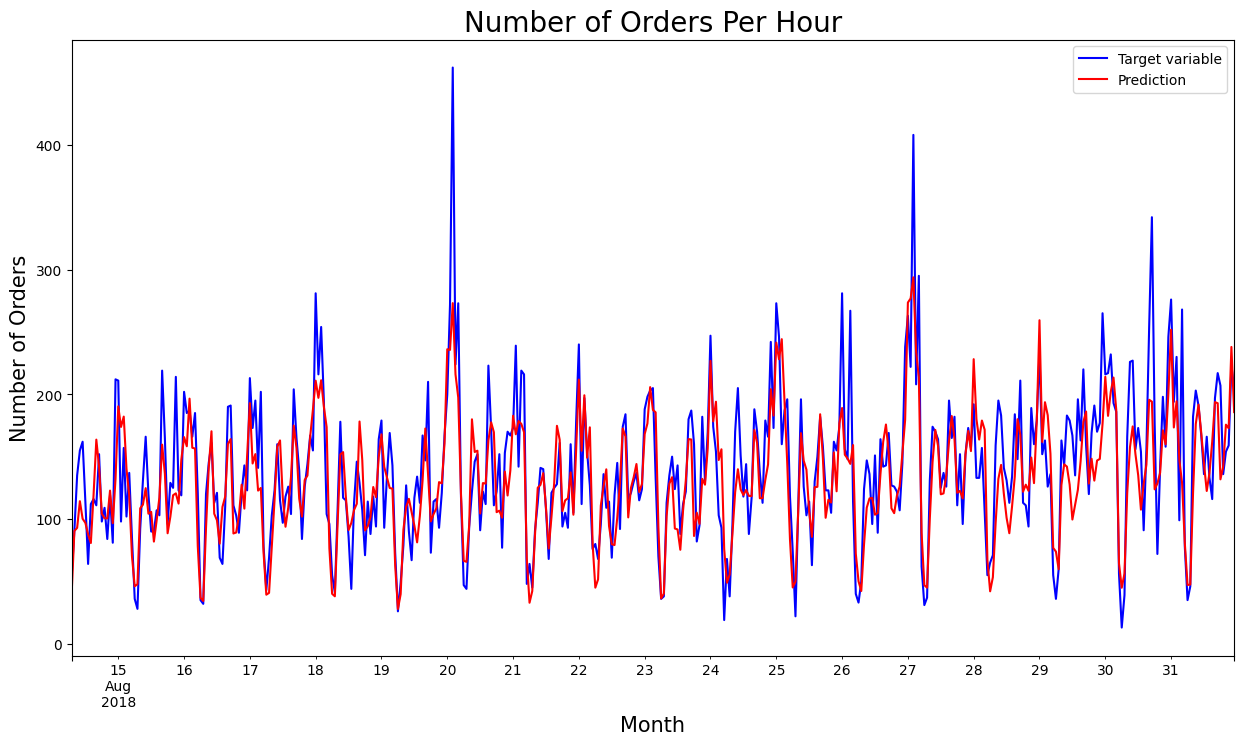

In [47]:
y_predict = pd.Series(y_predict_neural, index=y_test.index)
# Plotting the graph
plt.figure(figsize=(15, 8))

# Plotting the line for y_test (Target variable)
y_test.plot(label='Target variable', color='blue')
# Plotting the line for y_predict (Prediction)
y_predict.plot(label='Prediction', color='red')

# Adding axis labels and title
plt.title('Number of Orders Per Hour', fontsize=20)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Number of Orders', fontsize=15)

# Adding the legend 
plt.legend()

# Display the plot
plt.show()

The graph shows that the model poorly predicts large quantities, meaning it underestimates its predictions, which could lead to a shortage of taxis and a loss of potential profits.

Посмотрим на остатки модели

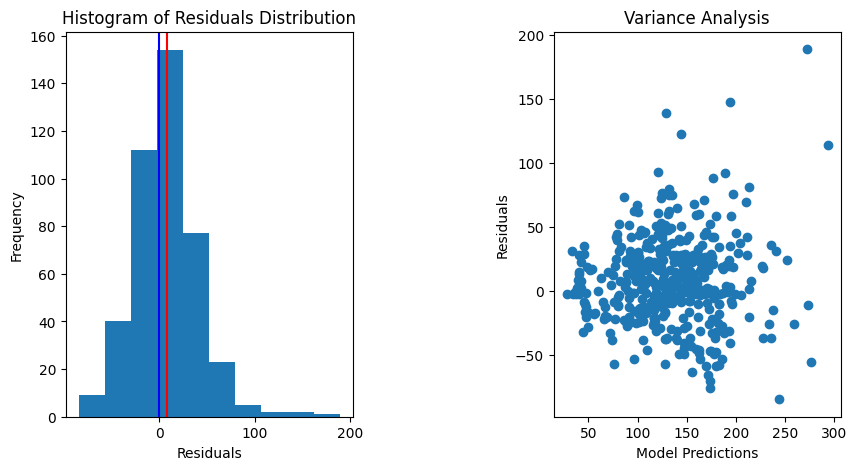

In [48]:
residuals = y_test - y_predict_neural

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
plt.subplots_adjust(wspace=0.7, hspace=0.5)
axes[0].hist(residuals)
axes[0].set_title('Histogram of Residuals Distribution')
axes[0].set_xlabel('Residuals')
axes[0].set_ylabel('Frequency')
axes[0].axvline(x=0, color='Blue')
axes[0].axvline(x=residuals.mean(), color='Red')
axes[1].scatter(x=y_predict_neural, y=residuals)
axes[1].set_xlabel('Model Predictions')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Variance Analysis')
plt.show()

The analysis of the model's residuals shows that the model underestimates the forecast, which can be explained by the increase in the number of orders observed in August.

## Conclusions

The goal of the project was to build a model to predict the number of taxis for the next hour.

The original data file was resampled at 1-hour intervals since the forecast needed to be provided for the hour.

Analysis showed that the number of orders depends on the month and time of day.

- The number of orders increases from March to August, reaching a peak in August.
- The highest number of orders occurs at 00:00, followed by a drop at 6:00 AM and two peaks at 11:30 AM and 5:30 PM, which could be linked to flight schedules.
- Clear patterns in orders are observed throughout the day.
- For further analysis and forecasting, new columns were added, including data on days, weekdays, and hours.

During the work, 6 models were trained, and a neural network was built to predict the number of taxi orders for the next hour (see the comparison table below).

Key parameters for feature creation:
- lag: 168
- rolling_mean: 100

For all models, except for linear regression, hyperparameter tuning was performed. To assess the adequacy of the models, two baseline forecasts were built:
- Using the mean value.
- Using the previous value in the series.

Based on the results of the work and hyperparameter tuning, the best performance was achieved by the **Neural Network** model:

- Its characteristics: Best Params: {'hidden_layers': [30, 50, 30], 'learning_rate': 0.01, 'activation_func': 'ReLU'}
- RMSE on the training set: 22.38
- RMSE on the test set: 34.75

In [49]:
table

,Model,Training Time,Parameters,RMSE Value
0,Constant,-,mean,84.744100
1,Prev_amount,-,prev_amount,59.054504
2,LinearRegression,0.140788,{'scaler': StandardScaler()},24.250628
3,DecisionTreeRegressor,0.302012,"{'regressor__max_depth': 5, 'regressor__max_fe...",26.900000
4,LGBMRegressor,1.305001,"{'learning_rate': 0.1, 'n_estimators': 50}",23.050000
5,KNeighborsRegressor,0.029816,"{'n_neighbors': 5, 'weights': 'distance'}",25.320000
6,XGBRegressor,1.04792,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",22.501600
7,CatBoostRegressor,6.461656,"{'iterations': 100, 'learning_rate': 0.1}",22.763300
8,Neural network,7.704926,"{'hidden_layers': [30, 50, 30], 'learning_rate...",22.383038


In [50]:
print(f"RMSE on test set neural: {rmse_test_neural:.4f}")

RMSE on test set neural: 34.7532


### Recommendations

To achieve more accurate predictions for the number of orders in the next hour, it is essential to collect a full year of data rather than just a few months. The observed increase in orders during August affects prediction quality.